## Part1: 

In [1]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("data/train.csv")
test_df    = pd.read_csv("data/test.csv")

# preview the data
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
print (titanic_df.isnull().sum()) #checking for total null values
print (test_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


How many Survived??

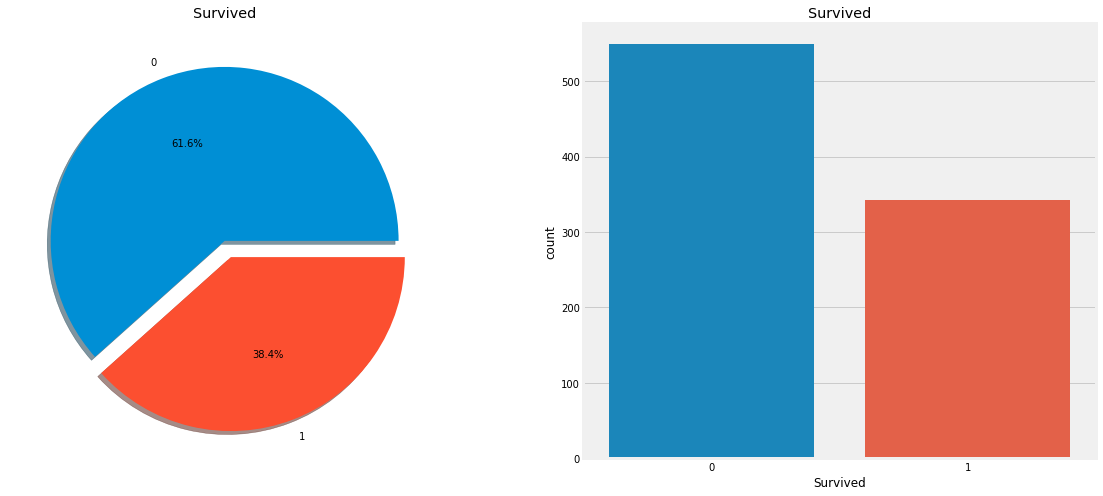

In [4]:
f,ax=plt.subplots(1,2,figsize=(18,8))
titanic_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=titanic_df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

## Part2: Feature Engineering and Data Cleaning

Types Of Features
#### Categorical Features:

A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

Categorical Features in the dataset: Sex,Embarked.
#### Ordinal Features:

An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

Ordinal Features in the dataset: PClass
#### Continous Feature:

A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

Continous Features in the dataset: Age


In [5]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

### Categorical Features

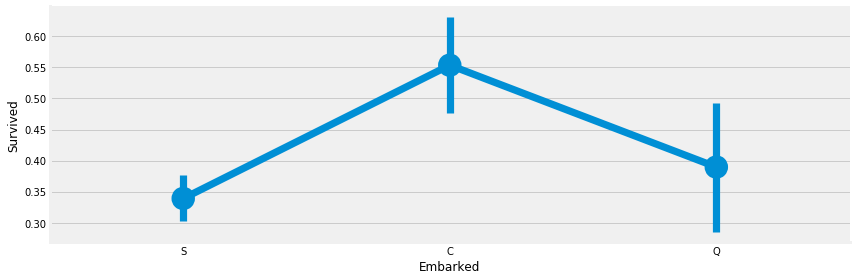

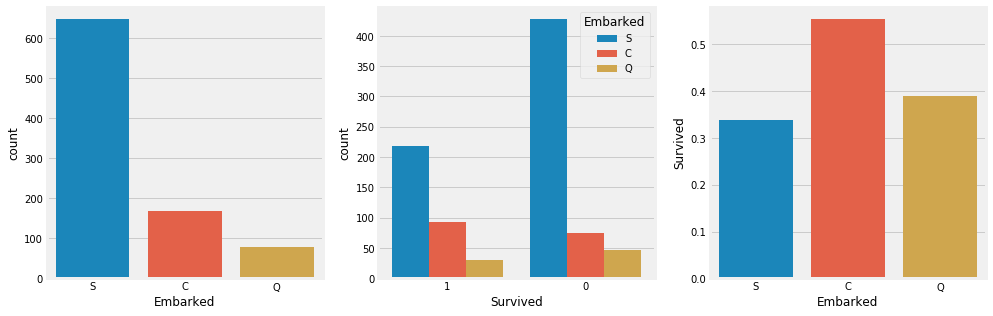

In [6]:
# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# plot
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

# Either to consider Embarked column in predictions,
# and remove "S" dummy variable, 
# and leave "C" & "Q", since they seem to have a good rate for Survival.

# OR, don't create dummy variables for Embarked column, just drop it, 
# because logically, Embarked doesn't seem to be useful in prediction.

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)


[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

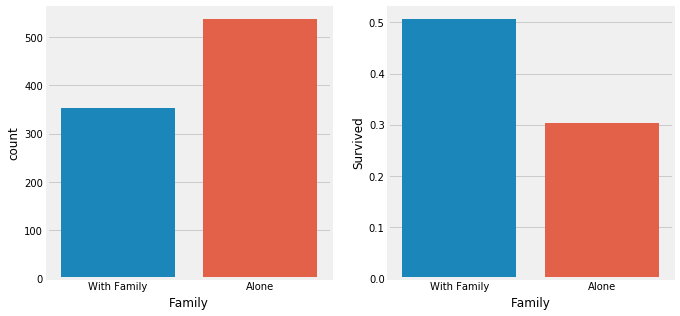

In [7]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)



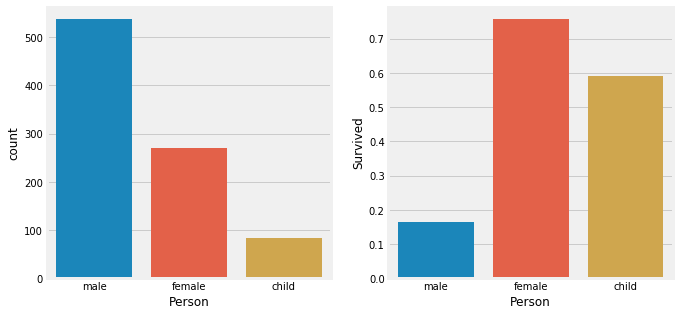

In [8]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex

titanic_df
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

### Continous feature

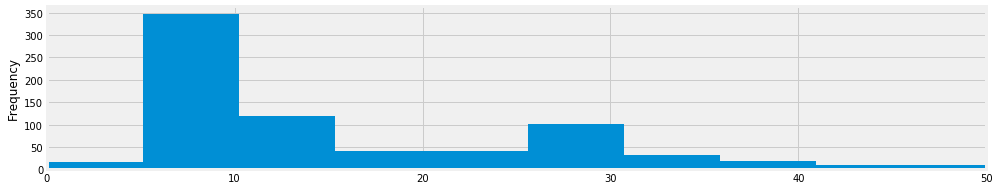

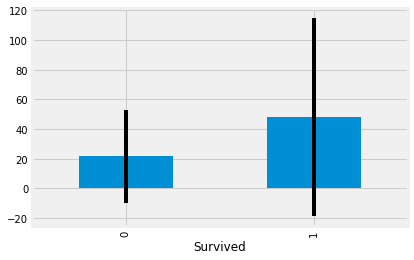

In [9]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# get average and std for fare of survived/not survived passengers
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

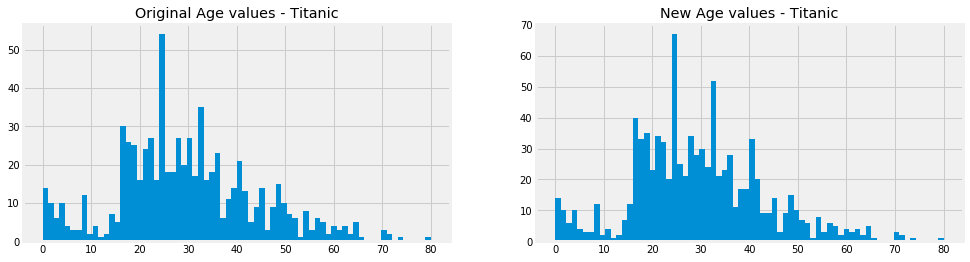

In [10]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

### Ordinal Features

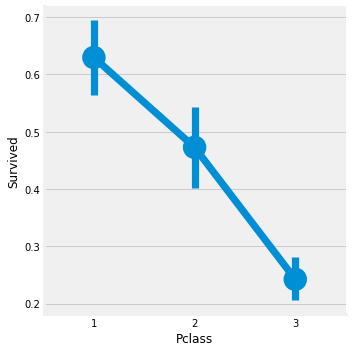

In [11]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

In [12]:
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

## Part3: Predictive Modeling

## TO-DO: turn the following cells into a reusable and callable script

### INPUT:
- target var file name, predictor vars file name, output directory, optional model pickle file

### OUTPUT:
- average cv metrics table. csv
- average ROC and Lift charts .jpg
- completed cv metrics table. csv
- box plot of metrics comparison .jpg
- confusion matrix plot. jpg

In [13]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.model_selection import cross_validate
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import roc_curve,roc_auc_score,f1_score
import numpy as np
import multiprocessing

In [14]:
num_workers = multiprocessing.cpu_count()

In [15]:
# Voating classifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train,Y_train)

# Split train data into train, validation set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

# Grid search on adaboost - 10 fold cv

In [17]:
# Hyperparameter search for adaboosting
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.2,0.4,0.6,0.8]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True, n_jobs=num_workers, cv=10)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.8s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   37.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:  1.9min finished


0.7993579454253612
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=800, random_state=None)


# mean & std dev

In [18]:
means = gd.cv_results_['mean_test_score']
stds = gd.cv_results_['std_test_score']
params = gd.cv_results_['params']

In [19]:
for mean, std, params in zip(means, stds, params):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.782 (+/-0.063) for {'learning_rate': 0.05, 'n_estimators': 100}
0.796 (+/-0.077) for {'learning_rate': 0.05, 'n_estimators': 200}
0.791 (+/-0.074) for {'learning_rate': 0.05, 'n_estimators': 300}
0.796 (+/-0.084) for {'learning_rate': 0.05, 'n_estimators': 400}
0.793 (+/-0.089) for {'learning_rate': 0.05, 'n_estimators': 500}
0.793 (+/-0.107) for {'learning_rate': 0.05, 'n_estimators': 600}
0.791 (+/-0.108) for {'learning_rate': 0.05, 'n_estimators': 700}
0.799 (+/-0.117) for {'learning_rate': 0.05, 'n_estimators': 800}
0.795 (+/-0.116) for {'learning_rate': 0.05, 'n_estimators': 900}
0.796 (+/-0.106) for {'learning_rate': 0.05, 'n_estimators': 1000}
0.791 (+/-0.087) for {'learning_rate': 0.2, 'n_estimators': 100}
0.791 (+/-0.110) for {'learning_rate': 0.2, 'n_estimators': 200}
0.795 (+/-0.102) for {'learning_rate': 0.2, 'n_estimators': 300}
0.796 (+/-0.132) for {'learning_rate': 0.2, 'n_estimators': 400}
0.799 (+/-0.126) for {'learning_rate': 0.2, 'n_estimators': 500}
0.795 (+/-0.12

## roc for adaboost - train set

In [20]:
# for training data
prediction = gd.predict(X_train)
prediction_prob = gd.predict_proba(X_train)

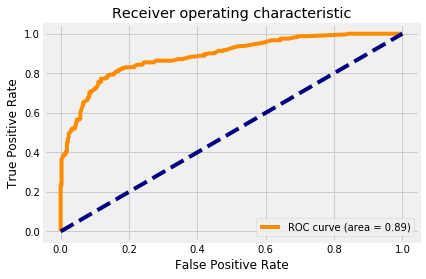

In [21]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train, prediction_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

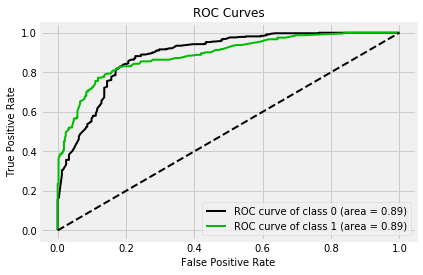

In [22]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_train, prediction_prob, plot_macro=False, plot_micro=False)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

## lift-chart adaboost - train set

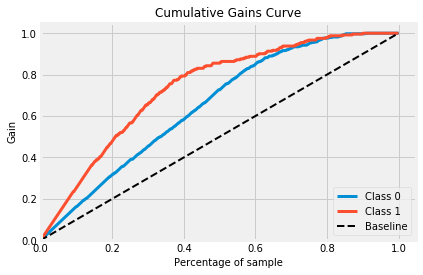

In [23]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_train, prediction_prob)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.show()

## roc for adaboost - validation set

In [24]:
# for validation data
prediction = gd.predict(X_test)
prediction_prob = gd.predict_proba(X_test)

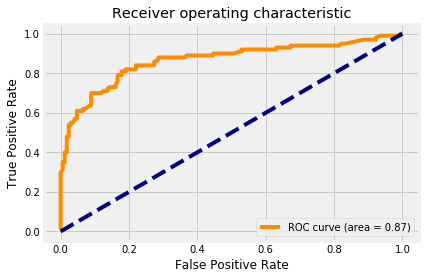

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

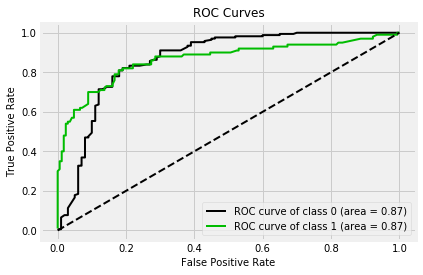

In [26]:
skplt.metrics.plot_roc(y_test, prediction_prob, plot_macro=False, plot_micro=False)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

## lift-chart adaboost - validation set

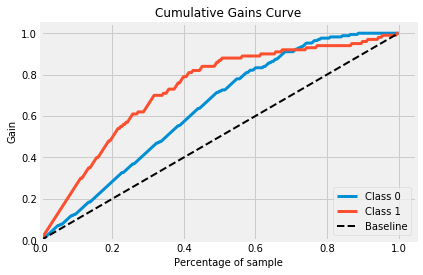

In [27]:
skplt.metrics.plot_cumulative_gain(y_test, prediction_prob)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.show()

# Grid search random forest - 10 fold cv

In [28]:
# Hyperparameter search for random forest
n_estimators=list(range(100,1100,100))
hyper={"n_estimators":n_estimators,"min_samples_leaf": [10,50,100,200,500]}

rfgd=GridSearchCV(estimator=RandomForestClassifier(random_state = 0), n_jobs=num_workers, param_grid=hyper,verbose=True, cv=10)
rfgd.fit(X_train,y_train)
print(rfgd.best_score_)
print(rfgd.best_estimator_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   33.4s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:  1.6min finished


0.7961476725521669
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


# mean & std dev

In [29]:
means_rf = rfgd.cv_results_['mean_test_score']
stds_rf = rfgd.cv_results_['std_test_score']
params_rf = rfgd.cv_results_['params']

In [30]:
for mean, std, params in zip(means_rf, stds_rf, params_rf):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.796 (+/-0.090) for {'min_samples_leaf': 10, 'n_estimators': 100}
0.782 (+/-0.085) for {'min_samples_leaf': 10, 'n_estimators': 200}
0.785 (+/-0.090) for {'min_samples_leaf': 10, 'n_estimators': 300}
0.787 (+/-0.078) for {'min_samples_leaf': 10, 'n_estimators': 400}
0.783 (+/-0.081) for {'min_samples_leaf': 10, 'n_estimators': 500}
0.787 (+/-0.078) for {'min_samples_leaf': 10, 'n_estimators': 600}
0.787 (+/-0.076) for {'min_samples_leaf': 10, 'n_estimators': 700}
0.783 (+/-0.076) for {'min_samples_leaf': 10, 'n_estimators': 800}
0.785 (+/-0.069) for {'min_samples_leaf': 10, 'n_estimators': 900}
0.785 (+/-0.069) for {'min_samples_leaf': 10, 'n_estimators': 1000}
0.770 (+/-0.045) for {'min_samples_leaf': 50, 'n_estimators': 100}
0.769 (+/-0.049) for {'min_samples_leaf': 50, 'n_estimators': 200}
0.761 (+/-0.055) for {'min_samples_leaf': 50, 'n_estimators': 300}
0.759 (+/-0.063) for {'min_samples_leaf': 50, 'n_estimators': 400}
0.767 (+/-0.056) for {'min_samples_leaf': 50, 'n_estimators':

# roc for rf - train

In [31]:
# for training data
prediction_rf = rfgd.predict(X_train)
prediction_rf_prob = rfgd.predict_proba(X_train)

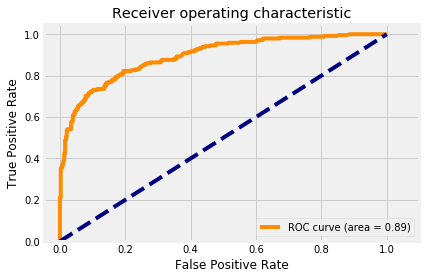

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train, prediction_rf_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

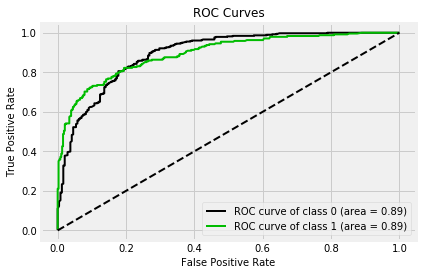

In [33]:
skplt.metrics.plot_roc(y_train, prediction_rf_prob, plot_macro=False, plot_micro=False)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

## lift chart - rf - train

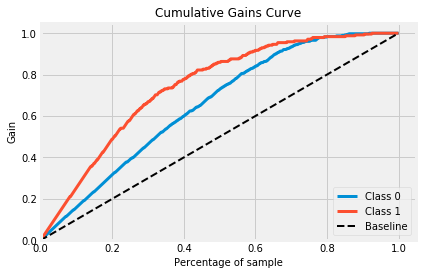

In [34]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_train, prediction_rf_prob)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.show()

## roc for rf - validation

In [35]:
# for validation data
prediction_rf = rfgd.predict(X_test)
prediction_rf_prob = rfgd.predict_proba(X_test)

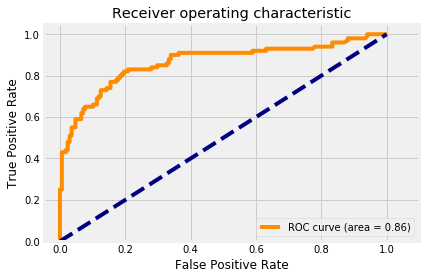

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_rf_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

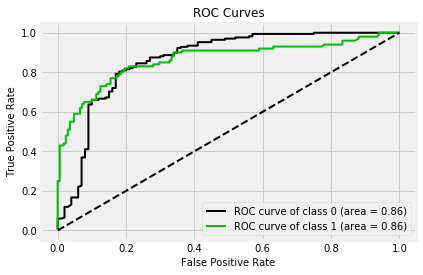

In [37]:
skplt.metrics.plot_roc(y_test, prediction_rf_prob, plot_macro=False, plot_micro=False)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

## lift chart -rf - validation set

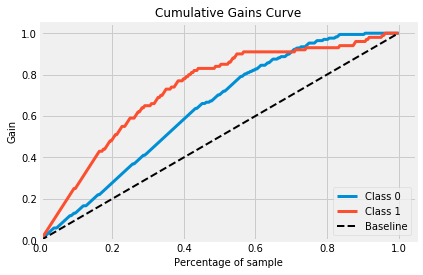

In [38]:
skplt.metrics.plot_cumulative_gain(y_test, prediction_rf_prob)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.show()

# Grid search logit regression - 10 fold cv

In [39]:
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "fit_intercept":[True, False]} # l1 lasso l2 ridge

logreg=LogisticRegression(random_state=0)
logreg_cv=GridSearchCV(logreg,grid,cv=10, n_jobs=num_workers, verbose=1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}
accuracy : 0.8105939004815409


[Parallel(n_jobs=12)]: Done 280 out of 280 | elapsed:    0.4s finished


# mean & std dev

In [40]:
means_lg = logreg_cv.cv_results_['mean_test_score']
stds_lg = logreg_cv.cv_results_['std_test_score']
params_lg = logreg_cv.cv_results_['params']

In [41]:
for mean, std, params in zip(means_lg, stds_lg, params_lg):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.629 (+/-0.034) for {'C': 0.001, 'fit_intercept': True, 'penalty': 'l1'}
0.660 (+/-0.082) for {'C': 0.001, 'fit_intercept': True, 'penalty': 'l2'}
0.629 (+/-0.034) for {'C': 0.001, 'fit_intercept': False, 'penalty': 'l1'}
0.665 (+/-0.084) for {'C': 0.001, 'fit_intercept': False, 'penalty': 'l2'}
0.655 (+/-0.083) for {'C': 0.01, 'fit_intercept': True, 'penalty': 'l1'}
0.695 (+/-0.105) for {'C': 0.01, 'fit_intercept': True, 'penalty': 'l2'}
0.655 (+/-0.083) for {'C': 0.01, 'fit_intercept': False, 'penalty': 'l1'}
0.697 (+/-0.118) for {'C': 0.01, 'fit_intercept': False, 'penalty': 'l2'}
0.778 (+/-0.076) for {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1'}
0.811 (+/-0.060) for {'C': 0.1, 'fit_intercept': True, 'penalty': 'l2'}
0.778 (+/-0.074) for {'C': 0.1, 'fit_intercept': False, 'penalty': 'l1'}
0.780 (+/-0.065) for {'C': 0.1, 'fit_intercept': False, 'penalty': 'l2'}
0.801 (+/-0.075) for {'C': 1.0, 'fit_intercept': True, 'penalty': 'l1'}
0.799 (+/-0.063) for {'C': 1.0, 'fit_intercept

# roc for logit - train

In [42]:
# for training data
prediction_lg = logreg_cv.predict(X_train)
prediction_lg_prob = logreg_cv.predict_proba(X_train)

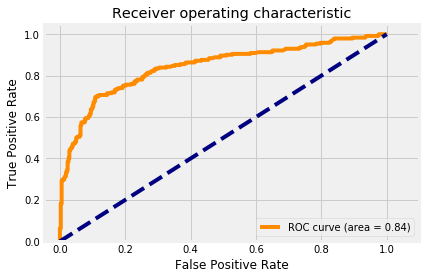

In [43]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train, prediction_lg_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

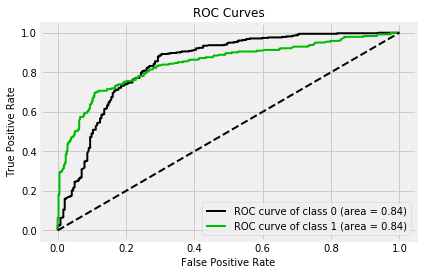

In [44]:
skplt.metrics.plot_roc(y_train, prediction_lg_prob, plot_macro=False, plot_micro=False)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

## lift chart - logit - train

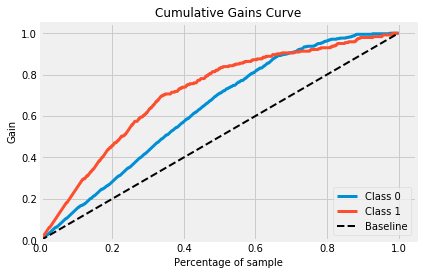

In [45]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_train, prediction_lg_prob)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.show()

## roc for logit - validation

In [46]:
# for validation data
prediction_lg = logreg_cv.predict(X_test)
prediction_lg_prob = logreg_cv.predict_proba(X_test)

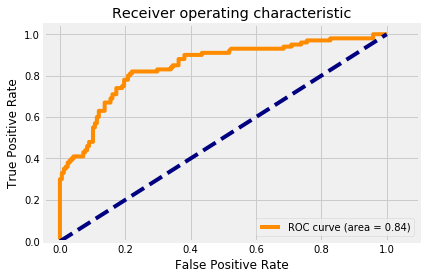

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, prediction_lg_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

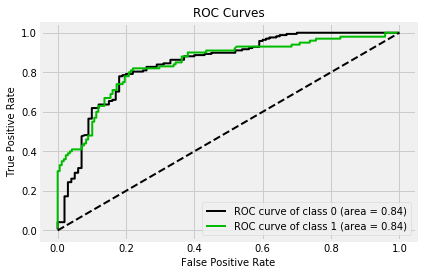

In [48]:
skplt.metrics.plot_roc(y_test, prediction_lg_prob, plot_macro=False, plot_micro=False)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.show()

## lift chart - logit - validation set

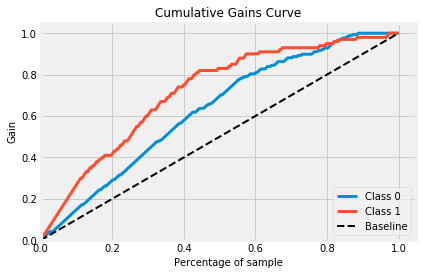

In [49]:
skplt.metrics.plot_cumulative_gain(y_test, prediction_lg_prob)
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.show()

# roc - rf vs adaboost vs logit - train data

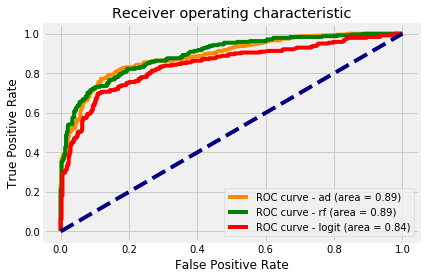

In [53]:
prediction_prob = gd.predict_proba(X_train)
prediction_rf_prob = rfgd.predict_proba(X_train)
prediction_lg_prob = logreg_cv.predict_proba(X_train)

fpr, tpr, thresholds = roc_curve(y_train, prediction_prob[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train, prediction_rf_prob[:,1])
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_train, prediction_lg_prob[:,1])

roc_auc = auc(fpr, tpr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lg = auc(fpr_lg, tpr_lg)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve - ad (area = %0.2f)' % roc_auc)
plt.plot(fpr_rf, tpr_rf, color='green', label='ROC curve - rf (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lg, tpr_lg, color='red', label='ROC curve - logit (area = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# roc - rf vs adaboost - validation data

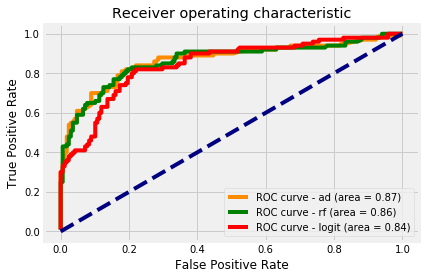

In [54]:
prediction_prob = gd.predict_proba(X_test)
prediction_rf_prob = rfgd.predict_proba(X_test)
prediction_lg_prob = logreg_cv.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, prediction_prob[:,1])
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prediction_rf_prob[:,1])
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test, prediction_lg_prob[:,1])

roc_auc = auc(fpr, tpr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lg = auc(fpr_lg, tpr_lg)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve - ad (area = %0.2f)' % roc_auc)
plt.plot(fpr_rf, tpr_rf, color='green', label='ROC curve - rf (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_lg, tpr_lg, color='red', label='ROC curve - logit (area = %0.2f)' % roc_auc_lg)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()